<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pandas as pd
pd.set_option("display.precision", 10)

In [2]:
ls = glob.glob('results/*')
ls.remove(glob.glob('results/*.xlsx')[0])

In [3]:
df_v_loss = pd.DataFrame(index=range(100))
df_t_loss = pd.DataFrame(index=range(100))
for folder in ls:
    if len(glob.glob(folder+'\*.csv'))>0:
        csv = glob.glob(folder+'\*.csv')[0]
        name = csv.split('\\')[-1][:-4]

        df = pd.read_csv(csv,sep=';', float_precision='round_trip')
        df_v_loss[name] = df['val_loss']
        
        df_t_loss[name] = df['loss']

In [4]:
pd.DataFrame((df_v_loss.min(),df_v_loss.apply(lambda x: x.argmin()))).transpose().sort_values(0)

,0,1
skip_con_cae_MSE_NoKReg_NoPlat,0.0000110335,32.0
small_res_cae_MSE_full_pre_NoKReg_NoPlat,0.0000392472,22.0
small_res_cae_MSE_full_pre_L2KReg_LRPlat_e100_b32_is128_csvlogger,0.0001097200,75.0
small_res_cae_MSE_original_NoKReg_NoPlat,0.0001111093,21.0
myronenko_cae_MSE_NoKReg_NoPlat,0.0001839338,8.0
myronenko_cae_MSE_L2KReg_NoPlat,0.0014740063,27.0


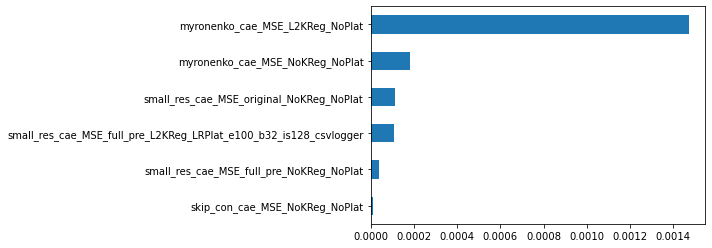

In [5]:
df_v_loss.min().sort_values().plot(kind='barh');

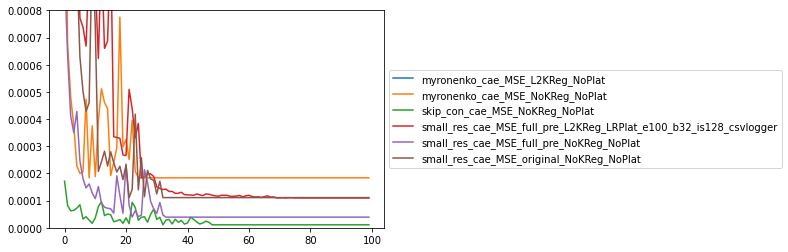

In [6]:
df_v_loss.fillna(df_v_loss.min(), inplace=True)
df_v_loss.plot(ylim=(0,0.0008)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

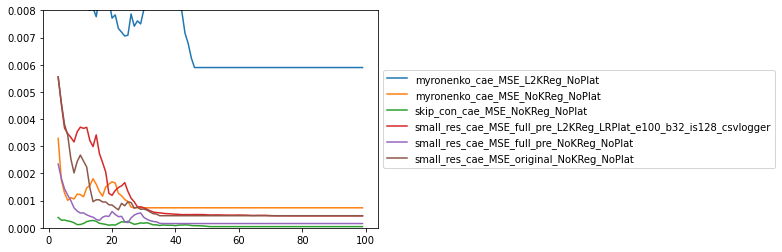

In [7]:
df_v_loss.rolling(4, axis=0).sum().plot(ylim=(0,0.008)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

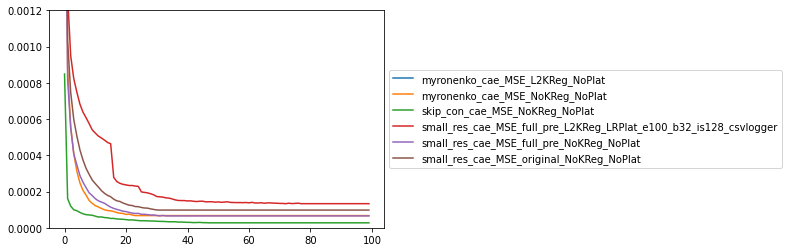

In [8]:
df_t_loss.fillna(df_t_loss.min(), inplace=True)
df_t_loss.plot(ylim=(0,0.0012)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))